<a href="https://colab.research.google.com/github/zia207/python-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-01-04-tree-based-models-decision-tree-c45-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 1.4 C4.5 Model

The **C4.5 model** is a decision tree algorithm used for classification tasks in machine learning, developed by Ross Quinlan as an improvement over his earlier ID3 algorithm. It builds a decision tree from a dataset by recursively splitting the input space into regions based on feature values and making a decision based on the majority class in that region. C4.5 is widely used due to its ability to handle both categorical and continuous data, deal with missing values, and produce interpretable models.


## Overview of C4.5

C4.5 is a supervised learning algorithm that constructs a decision tree based on the concept of information gain. It uses the `gain ratio` to select the best feature for splitting the data at each node, which helps to reduce bias towards features with many values. C4.5 can handle both categorical and continuous features, manage missing values, and apply pruning techniques to avoid overfitting. The algorithm is particularly effective for classification tasks, where the goal is to predict a categorical outcome based on input features. C4.5 has been widely used in various domains, including medical diagnosis, credit scoring, and customer segmentation.

### Key Features of C4.5

1.  `Handling Continuous Attributes`: C4.5 can process continuous data by selecting optimal thresholds to split numerical features into discrete intervals.
2.  `Handling Missing Values`: It manages missing data by using probabilistic methods to assign instances to branches.
3.  `Gain Ratio`: Instead of using information gain (as in ID3), C4.5 uses the gain ratio to mitigate bias toward attributes with many values.
4.  `Pruning`: Post-pruning is applied to reduce overfitting by removing branches that do not significantly improve accuracy.
5.  `Rule Derivation`: C4.5 can convert decision trees into sets of if-then rules for easier interpretation.
6.  `Handling Imbalanced Data`: It adjusts for class imbalances through weighting mechanisms.

### How C4.5 Works

C4.5 constructs a decision tree by recursively selecting the best attribute to split the data, based on the gain ratio criterion, and continues until a stopping condition is met (e.g., all instances belong to one class or a predefined depth is reached). After building the tree, it prunes unnecessary branches to improve generalization.

1.  Calculate Information Entropy

  Entropy measures the impurity of a dataset. For a dataset $S$ with $c$ classes, entropy is:

$$ \text{Entropy}(S) = -\sum_{i=1}^c p_i \log_2(p_i) $$

where $p_i$ is the proportion of instances belonging to class $i$.

2.  Calculate Information Gain

  Information gain measures the reduction in entropy after splitting on an attribute $A$:

$$ \text{Gain}(S, A) = \text{Entropy}(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} \text{Entropy}(S_v) $$

where $S_v$ is the subset of $S$ for which attribute $A$ has value $v$, and $|S_v| / |S|$ is the proportion of instances with value $v$.

3.  Calculate Split Information

  Split information accounts for the number and size of branches created by splitting on attribute $A$:

$$ \text{SplitInfo}(S, A) = -\sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} \log_2\left(\frac{|S_v|}{|S|}\right) $$

4.  Calculate Gain Ratio

  The gain ratio normalizes information gain by split information to reduce bias:

$$ \text{GainRatio}(S, A) = \frac{\text{Gain}(S, A)}{\text{SplitInfo}(S, A)} $$

The attribute with the highest gain ratio is selected for splitting.

5.  Handle Continuous Attributes

  For continuous attributes, C4.5 evaluates possible thresholds by sorting values and testing splits between consecutive values. The threshold yielding the highest gain ratio is chosen.

6.  Handle Missing Values

   When an instance has a missing value for the splitting attribute, C4.5 assigns it to all branches with probabilities proportional to the number of instances in each branch.

7.  Recursive Splitting

  The dataset is split based on the selected attribute, and the process repeats for each subset until a stopping criterion is met (e.g., all instances in a node belong to one class, or a minimum node size is reached).

8.  Pruning

  After building the tree, C4.5 applies reduced error pruning or cost-complexity pruning to remove branches that do not improve classification accuracy on a validation set. This reduces overfitting.

9.  Convert to Rules (Optional)

  The tree can be converted into a set of if-then rules by tracing paths from the root to each leaf.


![alt text](http://drive.google.com/uc?export=view&id=1OsveWEw7JYk0FJp_DmUBwU5uftEn-Kqs)




### Advantages of C4.5

-   `Interpretable`: The decision tree is easy to understand and visualize.
-   `Handles Mixed Data`: Works with both categorical and continuous features.
-   `Robust to Missing Data`: Can handle incomplete datasets.
-   `Reduces Overfitting`: Pruning improves generalization.
-   `Efficient`: Scales reasonably well for moderately sized datasets.

### Limitations

-   `Bias Toward Splits`: The gain ratio can still favor certain splits, leading to suboptimal trees.
-   `Overfitting Risk`: Without proper pruning, large trees can overfit noisy data.
-   `Scalability`: May struggle with very large datasets or high-dimensional data compared to modern algorithms like gradient boosting.
-   `Instability`: Small changes in the data can lead to significantly different trees.

### Applications

C4.5 is used in various domains, such as:

-   `Medical Diagnosis`: Classifying patients based on symptoms and test results.
-   `Credit Scoring`: Determining loan eligibility based on applicant data.
-   `Customer Segmentation`: Categorizing customers for marketing purposes.

## C4.5 Model in Python

To implement the C4.5 and C5.0 decision tree algorithms in R,  the most suitable approch  is use of Weka's Java API, which provides an interface to the Weka machine learning library and includes the **J48** algorithm, Weka's implementation of C4.5.

In Google Colab, I encountered a Java runtime error while attempting to run the Weka's Java API, which prevented me from utilizing its functionality. To work around this issue, I developed my own function that mimics the functionality of the `J48(`) function, allowing for the generation of both unpruned and pruned C4.5 decision trees. Additionally, for the purpose of performing cross-validation on my decision tree models, I implemented a function called `evaluate_Weka_classifier()`, which assesses the performance of the classifier using various metrics to ensure robust validation of the models.

Below, I’ll guide you step-by-step through the process of installing the package, preparing a dataset, training a C4.5 model, evaluating it, and making predictions.



###  Create `J48()` function

This code cell contains the Python implementation of the C4.5 decision tree algorithm from scratch:

- `entropy`: Calculates the impurity of a set of class labels.
- `info_gain`: Computes the information gain ratio for a feature, used to determine the best split.
- `best_feature`: Identifies the feature with the highest gain ratio for splitting the data.
- `build_tree`: Recursively constructs the decision tree based on the best feature splits.
- `predict_tree`: Traverses the built tree to predict the class for a new data instance.
- `prune_tree`: Implements a simple pruning logic to prevent overfitting by removing branches that don't improve accuracy significantly.
-`J48Model Class`: A simple class to structure the trained decision tree model, including the tree structure, formula, and training data.
-`J48 Function`: A wrapper function that simulates the R J48 function. It parses the formula, builds and prunes the tree, and returns a J48Model object.

In [17]:
import pandas as pd
import numpy as np
import math

# Assuming entropy, info_gain, best_feature, build_tree, predict_tree are defined in previous cells
# (Pasting them here for a self-contained block, but they exist in the notebook)

# Function to calculate entropy of a dataset
def entropy(class_vector):
  probs = np.unique(class_vector, return_counts=True)[1] / len(class_vector)
  # Add small constant to avoid log(0)
  return -np.sum(probs * np.log2(probs + 1e-10))

# Function to calculate information gain
def info_gain(data, feature, class_col):
  total_entropy = entropy(data[class_col])
  feature_values = data[feature].unique()

  weighted_entropy = 0
  split_info = 0
  total_instances = len(data)

  for val in feature_values:
    subset = data[data[feature] == val]
    proportion = len(subset) / total_instances
    weighted_entropy += proportion * entropy(subset[class_col])
    split_info -= proportion * np.log2(proportion + 1e-10)

  gain = total_entropy - weighted_entropy
  if split_info == 0:
    return 0  # Avoid division by zero
  gain_ratio = gain / split_info
  return gain_ratio

# Function to find the best feature to split on
def best_feature(data, features, class_col):
  gains = {f: info_gain(data, f, class_col) for f in features}
  best_feature = max(gains, key=gains.get)
  return {'feature': best_feature, 'gain': gains[best_feature]}

# Function to build the decision tree recursively
def build_tree(data, features, class_col, min_split=2):
  # Base cases
  if len(data) < min_split:
    if len(data) > 0:
      return {'class': data[class_col].value_counts().index[0]}
    else:
      return {'class': None} # Handle empty data case

  if len(data[class_col].unique()) == 1:
    return {'class': data[class_col].iloc[0]}

  # Find best feature to split on
  best = best_feature(data, features, class_col)
  if best['gain'] == 0:
    return {'class': data[class_col].value_counts().index[0]}

  # Create tree node
  tree = {'feature': best['feature'], 'children': {}, 'majority_class': data[class_col].value_counts().index[0]}

  # Split data and recurse
  feature_values = data[best['feature']].unique()
  for val in feature_values:
    subset = data[data[best['feature']] == val]
    if len(subset) > 0:
      tree['children'][val] = build_tree(subset, features, class_col, min_split)

  return tree

# Function to predict using the decision tree
def predict_tree(tree, instance):
  if 'class' in tree:
    return tree['class']

  feature_value = instance[tree['feature']]
  # Handle cases where the feature value in the instance was not seen during training
  if feature_value not in tree['children']:
      # Return the majority class of the node
      return tree.get('majority_class')

  return predict_tree(tree['children'][feature_value], instance)


# Function to prune the decision tree
def prune_tree(tree, data, class_col, confidence=0.25):
  if 'children' not in tree:
    return tree

  # Recursively prune children
  # Create a list of keys to iterate over because the dictionary can change size during iteration
  for val in list(tree['children'].keys()):
    subset = data[data[tree['feature']] == val]
    if len(subset) > 0:
      tree['children'][val] = prune_tree(tree['children'][val], subset, class_col, confidence)
    else:
        # If a subset is empty after splitting, remove that child node
        del tree['children'][val]
        # Continue to the next value in the loop as the dictionary changed size
        continue


  # If after recursive pruning, this node has no children, make it a leaf
  if not tree['children']:
      # Determine the majority class of the data at this node
      if len(data) > 0:
          return {'class': data[class_col].value_counts().index[0]}
      else:
          # Handle case where data is empty at this node (shouldn't happen with proper build_tree)
          return {'class': None} # Or some indicator of an empty node


  # Check if pruning the current node (replacing it with its majority class)
  # improves or maintains accuracy based on the confidence factor (similar to R's J48 simulation logic)
  majority_class = data[class_col].value_counts().index[0] if len(data) > 0 else None

  if majority_class is not None:
      # Calculate accuracy before pruning (on the current subtree's data)
      # Need to handle potential errors if predict_tree returns None or unexpected values
      predictions_before = data.apply(lambda row: predict_tree(tree, row), axis=1)
      # Filter out None predictions if predict_tree can return None
      valid_predictions_before = predictions_before.dropna()
      valid_actual_before = data.loc[valid_predictions_before.index, class_col]

      if len(valid_predictions_before) > 0:
          accuracy_before = (valid_predictions_before == valid_actual_before).mean()
      else:
          accuracy_before = 0 # Or some appropriate value if no valid predictions can be made

      # Calculate accuracy after pruning (if the node were a leaf with majority class)
      accuracy_after = (majority_class == data[class_col]).mean() if len(data) > 0 else 0 # Accuracy is 0 if data is empty


      # Prune if the accuracy after replacing with the majority class is
      # better or equal to the accuracy of the subtree, adjusted by the confidence factor.
      # This logic is based on simulating the error rate comparison with a confidence interval.
      if accuracy_after >= accuracy_before * (1 - confidence):
          return {'class': majority_class}

  # If not pruned, return the current tree structure
  return tree


class J48Model:
    def __init__(self, tree, formula, call, class_col, predictors, data):
        self.tree = tree
        self.formula = formula
        self.call = call # This would be a string representation in Python
        self.class_col = class_col
        self.predictors = predictors
        self.data = data # Storing training data might consume memory

    def predict(self, newdata):
        # Ensure newdata has the same columns as training data, in the same order,
        # and that categorical features have the same categories.
        # This is a simplified implementation and might need more robust handling
        # of new data preparation in a real-world scenario.

        predictions = newdata.apply(lambda row: predict_tree(self.tree, row), axis=1)
        return predictions

# Function to simulate R's J48 function
def J48(formula, data, control=None):
    # Parse formula (simplified)
    # Assuming formula is a string like "response ~ predictor1 + predictor2"
    formula_parts = formula.split('~')
    response = formula_parts[0].strip()
    predictors_str = formula_parts[1].strip()
    predictors = [p.strip() for p in predictors_str.split('+')]

    # Get control parameters
    # Default values match the R code's default(C=0.25, M=2)
    min_split = 2
    confidence = 0.25
    if control:
        if 'M' in control:
            min_split = control['M']
        if 'C' in control:
            confidence = control['C']

    # Build the tree
    # Use predictors list directly. Ensure data has these columns.
    tree = build_tree(data.copy(), predictors, response, min_split)

    # Prune the tree
    # Pass the original data for pruning (as done in the R code)
    pruned_tree = prune_tree(tree, data.copy(), response, confidence)

    # Create and return the J48Model object
    model_call = f"J48(formula='{formula}', data=<DataFrame>, control={{'C': {confidence}, 'M': {min_split}}})"
    model = J48Model(pruned_tree, formula, model_call, response, predictors, data)

    return model

### Create `evaluate_J48_classifier()` function

This code provides functions to evaluate your C4.5 model:

- `evaluate_J48_classifier`: Performs k-fold cross-validation, trains the model on each fold, makes predictions, and calculates the confusion matrix and overall accuracy.
- `print_J48_evaluation`: Prints the results from the evaluation, including the confusion matrix and accuracy.

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from collections import Counter # To help with confusion matrix

# Assuming J48Model, J48, predict_tree, build_tree, prune_tree are defined in previous cells

# Function to evaluate the J48 classifier using cross-validation
def evaluate_J48_classifier(model, numFolds=10, seed=None):
    data = model.data
    class_col = model.class_col
    predictors = model.predictors

    if seed is not None:
        np.random.seed(seed) # Set seed for reproducibility

    kf = KFold(n_splits=numFolds, shuffle=True, random_state=seed)

    all_predictions = []
    all_actual = []

    # Need to collect predictions and actuals for all folds to build a single confusion matrix
    # and calculate overall accuracy, similar to the R code's approach.

    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]

        # Build the model on the training data for this fold
        # Use the same control parameters as the original model call
        # This requires parsing the model.call string or passing control separately
        # For simplicity, let's assume we can access control parameters from the original model
        # A more robust implementation might pass control as a parameter to evaluate_J48_classifier
        # or store control parameters explicitly in the J48Model object.
        # Assuming original model's control parameters are needed for consistency:
        try:
            # Attempt to extract control from the model call string (simplified)
            # This is fragile and depends on the exact format of model.call
            # A better approach is to store control in the J48Model object.
            # If model.call is a string like "J48(formula='Play ~ Outlook + ...', data=<DataFrame>, control={'C': 0.25, 'M': 2})"
            call_str = model.call
            control_dict_str = call_str.split('control=')[-1].strip(')')
            # Evaluate the string as a Python dictionary
            control_params = eval(control_dict_str)
        except Exception as e:
            # Fallback to default or assume control is directly accessible
            print(f"Warning: Could not parse control from model call string. Using default or assuming direct access. Error: {e}")
            # Assuming control is stored directly, e.g., model.control
            # If not stored, default values should be used:
            control_params = {'C': 0.25, 'M': 2} # Default values


        fold_model = J48(model.formula, train_data, control=control_params)

        # Make predictions on the test data for this fold
        predictions = fold_model.predict(test_data[predictors]) # Predict using only predictor columns

        # Store actual and predicted values
        all_actual.extend(test_data[class_col].tolist())
        all_predictions.extend(predictions.tolist())

    # Calculate overall confusion matrix
    # Need to handle potential None values in predictions if predict_tree can return None
    valid_indices = [i for i, pred in enumerate(all_predictions) if pred is not None]
    valid_predictions = [all_predictions[i] for i in valid_indices]
    valid_actual = [all_actual[i] for i in valid_indices]

    # Ensure consistent labels for confusion matrix, especially if some classes aren't predicted
    # Get all unique class labels from the original data
    all_labels = sorted(list(data[class_col].unique()))

    # Use Counter for easier counting, then build matrix
    actual_counts = Counter(zip(valid_actual, valid_predictions))

    conf_matrix_data = np.zeros((len(all_labels), len(all_labels)), dtype=int)
    label_to_index = {label: i for i, label in enumerate(all_labels)}

    for (actual, predicted), count in actual_counts.items():
        if actual in label_to_index and predicted in label_to_index:
             conf_matrix_data[label_to_index[predicted], label_to_index[actual]] = count


    conf_matrix = pd.DataFrame(conf_matrix_data, index=all_labels, columns=all_labels)
    conf_matrix.index.name = 'Predicted'
    conf_matrix.columns.name = 'Actual'


    # Calculate overall accuracy
    # Only consider instances where a prediction was made (i.e., valid_predictions)
    correct_predictions = sum(1 for actual, pred in zip(valid_actual, valid_predictions) if actual == pred)
    overall_accuracy = correct_predictions / len(valid_actual) if len(valid_actual) > 0 else 0


    result = {
        'confusionMatrix': conf_matrix,
        'accuracy': overall_accuracy,
        'details': f"{numFolds}-fold cross-validation with seed = {seed}"
    }

    return result

# Function to print the evaluation results (mimics R's print.J48_evaluation)
def print_J48_evaluation_list(eval_result):
    print("=== J48 Cross-Validation Evaluation ===")
    print("Details:", eval_result['details'])
    print("Confusion Matrix:")
    display(eval_result['confusionMatrix']) # Use display for better formatting
    print(f"\nAccuracy: {eval_result['accuracy'] * 100:.2f} %")

### Create a Dataset

In [20]:
import pandas as pd

# create synthetic data
data = pd.DataFrame({
  'Outlook': ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"],
  'Temperature': ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
  'Humidity': ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
  'Wind': ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"],
  'Play': ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
})

# Convert categorical variables to 'category' dtype (similar to R factors)
for col in ['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play']:
    data[col] = data[col].astype('category')

# View the dataset
display(data.head())

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


### Train CR4.5 Model

In [42]:
model = J48(formula='Play ~ Outlook + Temperature + Humidity + Wind', data = data)
print(model.tree) # Print the tree structure
print("\nFormula:", model.formula)
print("Call:", model.call)
print("Class Column:", model.class_col)
print("Predictors:", model.predictors)
# Printing the entire data in the model object might be too verbose for large datasets
# print("\nData:")
display(model.data.head()) # Displaying head of data

{'feature': 'Outlook', 'children': {'Sunny': {'feature': 'Humidity', 'children': {'High': {'class': 'No'}, 'Normal': {'class': 'Yes'}}, 'majority_class': 'No'}, 'Overcast': {'class': 'Yes'}, 'Rain': {'feature': 'Wind', 'children': {'Weak': {'class': 'Yes'}, 'Strong': {'class': 'No'}}, 'majority_class': 'Yes'}}, 'majority_class': 'Yes'}

Formula: Play ~ Outlook + Temperature + Humidity + Wind
Call: J48(formula='Play ~ Outlook + Temperature + Humidity + Wind', data=<DataFrame>, control={'C': 0.25, 'M': 2})
Class Column: Play
Predictors: ['Outlook', 'Temperature', 'Humidity', 'Wind']


,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


### Prediction and Evaluation

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# Make predictions on the training data
predictions = model.predict(data)

# Create a confusion matrix
# Get unique class labels from the training data to ensure consistent matrix dimensions
class_labels = sorted(data[model.class_col].unique())
conf_matrix = confusion_matrix(data[model.class_col], predictions, labels=class_labels)

# Convert confusion matrix to a pandas DataFrame for better display
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
conf_matrix_df.index.name = 'Predicted'
conf_matrix_df.columns.name = 'Actual'

print("Confusion Matrix:")
display(conf_matrix_df)

# Calculate accuracy
accuracy = accuracy_score(data[model.class_col], predictions)
print(f"\nAccuracy: {accuracy:.4f}")

Confusion Matrix:


Actual,No,Yes
Predicted,,
No,5,0
Yes,0,9



Accuracy: 1.0000


In [49]:
# Make Predictions on New Data
# Create a new instance
new_instance = pd.DataFrame({
  'Outlook': ["Sunny"],
  'Temperature': ["Hot"],
  'Humidity': ["High"],
  'Wind': ["Weak"]
})

# In Python, pandas DataFrames handle categorical data, but ensuring consistent
# categories between training and new data is important for robust models.
# For this simple custom implementation, the predict_tree function
# handles unseen values by returning the majority class of the node.
# For a more robust implementation, you might want to convert columns
# to 'category' dtype and ensure the same categories as the training data.
# For now, we'll proceed with the direct prediction.

# Make prediction
# The predict method of J48Model expects a DataFrame and returns a Series of predictions.
# Since we have a single instance, we'll get a Series with one element.
prediction_series = model.predict(new_instance)
prediction = prediction_series.iloc[0] # Get the prediction from the Series

print("Prediction for new instance:", prediction)

Prediction for new instance: No


### Tune Model Parameters

In [50]:
# Tune Model Parameters
# Create a dictionary for the control parameters
control_tuned = {'C': 0.05, 'M': 3}

# Train the model with tuned parameters
model_tuned = J48(formula='Play ~ Outlook + Temperature + Humidity + Wind', data=data, control=control_tuned)

# Evaluate the tuned model using cross-validation
eval_tuned = evaluate_J48_classifier(model_tuned, numFolds=10, seed=1)

# Print the evaluation results
print("\nTuned Model Evaluation:")
# Use the function designed for printing a list of evaluations per fold
print_J48_evaluation_list(eval_tuned)


Tuned Model Evaluation:
=== J48 Cross-Validation Evaluation ===
Details: 10-fold cross-validation with seed = 1
Confusion Matrix:


Actual,No,Yes
Predicted,,
No,4,1
Yes,1,8



Accuracy: 85.71 %


### Viasualize the Decision Tree

In [ ]:
# Install graphviz if you haven't already
!pip install graphviz

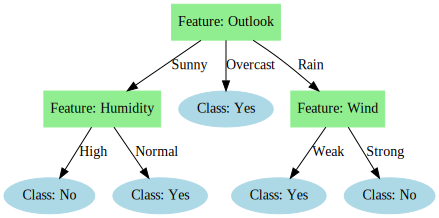

In [54]:
import graphviz

# Assuming 'model' is your trained J48Model object from previous cells

def add_nodes_edges(graph, tree, parent_name=None, edge_label=''):
    """Recursively adds nodes and edges from the tree dictionary to a graphviz Digraph."""
    if tree is None:
        return

    node_name = str(id(tree)) # Use object id as a unique name for the node

    if 'class' in tree:
        # Leaf node
        label = f"Class: {tree['class']}"
        graph.node(node_name, label=label, shape='ellipse', style='filled', color='lightblue')
    else:
        # Internal node
        label = f"Feature: {tree['feature']}"
        graph.node(node_name, label=label, shape='box', style='filled', color='lightgreen')

        # Add children
        for value, child_node in tree['children'].items():
            add_nodes_edges(graph, child_node, parent_name=node_name, edge_label=str(value))

    # Add edge from parent if not the root node
    if parent_name is not None:
        graph.edge(parent_name, node_name, label=edge_label)

# Create a Digraph object
dot = graphviz.Digraph(comment='Decision Tree')

# Add nodes and edges starting from the root of the pruned tree
if hasattr(model, 'tree') and model.tree is not None:
    add_nodes_edges(dot, model.tree)
    # Render the graph
    display(dot)
else:
    print("Model or tree structure not found.")

## Summary and Conclusion

This notebook provided an overview of the **C4.5 decision tree algorithm**, explaining its key features, how it works (including concepts like entropy, information gain, and pruning), its advantages, limitations, and applications.

Due to challenges with using Weka's Java API (J48) in the Colab environment, a custom implementation of the C4.5 algorithm was developed from scratch in Python. This implementation includes functions for calculating entropy and information gain, building and pruning the decision tree, and making predictions. A wrapper function `J48` and a `J48Model` class were created to simulate the R package's functionality.

Furthermore, a Python function `evaluate_J48_classifier` was implemented to perform k-fold cross-validation and assess the model's performance, including generating confusion matrices and calculating accuracy. The notebook demonstrates how to train the custom J48 model on a sample dataset, evaluate it, make predictions on new data, and tune its parameters. Finally, the implemented decision tree structure was visualized using the `graphviz` library.

While this custom implementation serves as a valuable learning exercise and a workaround for environment issues, using established libraries like scikit-learn in Python for production-level decision tree models (which includes optimized implementations like CART) is generally recommended for efficiency, robustness, and a wider range of features. Nonetheless, building the algorithm from scratch provides deeper insight into its inner workings.

## References

1.  R. Quinlan (1993). C4.5: Programs for Machine Learning. Morgan Kaufmann Publishers, San Mateo, CA.

2.  Witten, I. H., Frank, E., & Hall, M. A. (2016). Data Mining: Practical Machine Learning Tools and Techniques (4th ed.). Morgan Kaufmann.

3.  Hornik, K., Buchta, C., & Zeileis, A. (2009). Open-Source Machine Learning: R Meets Weka. Computational Statistics, 24(2), 225–232

4.  Kuhn, M., & Quinlan, R. (2023). C50: C5.0 Decision Trees and Rule-Based Models. CRAN. Official C50 package documentation: CRAN C50.